## imports

In [2]:
import rsatoolbox
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import sys
sns.set_style('darkgrid')
import mc


path_data = "/Users/student/PycharmProjects/data"

# Create Representation Disimilarity Matrix (RDM)
## Define plot function

In [27]:
def plot_RDM(rdm_matrix, title, labels, DPI=300):
    """
    :param rdm_matrix: RDM matrix to plot
    :param title: title of the plot
    :param labels: labels of the RDM for each of the different conditions
    """
    # plot RDM matrix
    plt.figure(figsize=(10, 10), dpi=DPI)
    plt.imshow(rdm_matrix, cmap='plasma')
    # add vertical line to plot
    plt.axvline(9.5, color='black', linewidth=2)
    plt.axhline(9.5, color='black', linewidth=2)
    plt.colorbar()
    plt.grid(False)
    plt.title(title)
    plt.xticks(range(len(labels)), labels, rotation=45, horizontalalignment='right')
    plt.yticks(range(len(labels)), labels             , horizontalalignment='right')
    plt.xlabel("Condition 1")
    plt.ylabel("Condition 2")
    plt.show()

# test function

# set random seed
np.random.seed(0)

np.random.rand(20, 20), 
labels = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't']
# plot_RDM(np.random.rand(20, 20), 'test', labels)



## Create a random RDM matrix (for real)

In [28]:
# create labels (Syntax: Pattern (A - E), Part (1, 2), Instructuion (f, b))
conditions = ['A1_forw', 'A1_backw', \
              'B1_forw', 'B1_backw', \
              'C1_forw', 'C1_backw', \
              'D1_forw', 'D1_backw', \
              'E1_forw', 'E1_backw', \
              'A2_forw', 'A2_backw', \
              'B2_forw', 'B2_backw', \
              'C2_forw', 'C2_backw', \
              'D2_forw', 'D2_backw', \
              'E2_forw', 'E2_backw']

# print(len(conditions))
# # create RDM matrix
# RSA_model = np.zeros((len(conditions), len(conditions)))
# plot_RDM(RSA_model, 'Random RDM', conditions)

In [29]:
def create_execution_RSM(conditions) -> np.array:
    """
    Construct a controlled RDM
    :param conditions: list of different conditions are compared that represent the different conditions given to to participant during the study

    :return: RDM matrix (np.ndarray). This is the matrix of similarities between the different conditions
    """
    # initialize RDM matrix
    RSA_model = np.zeros((len(conditions), len(conditions)))
    # the condition being compared to all other conditions (including itself)
    for idx1, condition1 in enumerate(conditions):

        for idx2, condition2 in enumerate(conditions):
        
            if condition1[0] == condition2[0]: # A, B, C, D, E
                # they are both the same pattern of coins
                if condition1[1] == condition2[1]: # 1, 2
                    # they are the same task half. In different task halves the excuation (A1 is the reverse of the execution A2)
                    if condition1[3] == condition2[3]:
                        # they are the same instructions directions
                        RSA_model[idx1, idx2] = +1
                    else:
                        # they are different instructions directions
                        RSA_model[idx1, idx2] = -1
                else:
                    # they are different  task halves, the execution is the reverse of the other task half
                    if condition1[3] == condition2[3]: # f, b
                        # they are the same instructions directions
                        RSA_model[idx1, idx2] = -1 # i.e. A1f is the reversed executution of A2f
                    else:
                        RSA_model[idx1, idx2] = +1 # i.e. A1f is the same execution as A2b

            else:
                # they are different patterns of coins
                if condition1[1] == condition2[1]:
                    # they are the same task half
                    if condition1[3] == condition2[3]:
                        # they are the same instructions directions
                        RSA_model[idx1, idx2] = -1/4
                    else:
                        RSA_model[idx1, idx2] = +1/4
                    pass
                else:
                    # they are different task halves
                    if condition1[3] == condition2[3]:
                        # they are the same instructions directions
                        RSA_model[idx1, idx2] = -1/4
                    else:
                        RSA_model[idx1, idx2] = +1/4    
                pass                    
    
    return RSA_model



rsm = create_execution_RSM(conditions)

# plot_RDM(rsm, 'Execution Similarity Matrix, with controls: diffculty and time', conditions)

In [ ]:
# load in csv of behavioral data

# Which subject to analyze
# note that i only have the data for 1 subject
sub_no = '01'

# path to data
path_data = "/Users/student/PycharmProjects/data"
path_beh = f"{path_data}/raw/sub-{sub_no}/beh"

sub_fmri_pt1 = pd.read_csv(f"{path_beh}/sub-{sub_no}_fmri_pt1_all.csv")


In [ ]:
sub_fmri_pt1

,Round,Config,rew_x_A,rew_y_A,rew_x_B,rew_y_B,rew_x_C,rew_y_C,rew_x_D,rew_y_D,...,background_feedback.stopped,feedback_text.started,feedback_text.stopped,participant,session,date,expName,psychopyVersion,frameRate,Unnamed: 85
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,karan_pt1MRI,1.0,2023-09-12_13h57.25.051,3x3_fMRI_part1,2022.1.1,59.277244,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,karan_pt1MRI,1.0,2023-09-12_13h57.25.051,3x3_fMRI_part1,2022.1.1,59.277244,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,karan_pt1MRI,1.0,2023-09-12_13h57.25.051,3x3_fMRI_part1,2022.1.1,59.277244,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,karan_pt1MRI,1.0,2023-09-12_13h57.25.051,3x3_fMRI_part1,2022.1.1,59.277244,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,karan_pt1MRI,1.0,2023-09-12_13h57.25.051,3x3_fMRI_part1,2022.1.1,59.277244,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
620,5.0,A2,0.21,0.29,0.0,0.0,-0.21,-0.29,-0.21,0.29,...,NaN,NaN,NaN,karan_pt1MRI,1.0,2023-09-12_13h57.25.051,3x3_fMRI_part1,2022.1.1,59.277244,NaN
621,5.0,A2,0.21,0.29,0.0,0.0,-0.21,-0.29,-0.21,0.29,...,NaN,NaN,NaN,karan_pt1MRI,1.0,2023-09-12_13h57.25.051,3x3_fMRI_part1,2022.1.1,59.277244,NaN
622,5.0,A2,0.21,0.29,0.0,0.0,-0.21,-0.29,-0.21,0.29,...,NaN,NaN,NaN,karan_pt1MRI,1.0,2023-09-12_13h57.25.051,3x3_fMRI_part1,2022.1.1,59.277244,NaN
623,5.0,A2,0.21,0.29,0.0,0.0,-0.21,-0.29,-0.21,0.29,...,NaN,NaN,NaN,karan_pt1MRI,1.0,2023-09-12_13h57.25.051,3x3_fMRI_part1,2022.1.1,59.277244,NaN


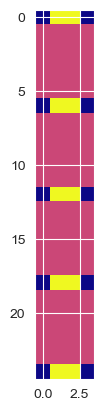

In [9]:
states = np.eye(5)

task_half = np.array([[-1, +1], 
                      [+1, -1]]) 

output = np.outer(states, task_half)
plt.imshow(output, cmap='plasma')

A1_forw
A1_backw
B1_forw
B1_backw
C1_forw
C1_backw
D1_forw
D1_backw
E1_forw
E1_backw
A2_forw
A2_backw
B2_forw
B2_backw
C2_forw
C2_backw
D2_forw
D2_backw
E2_forw
E2_backw


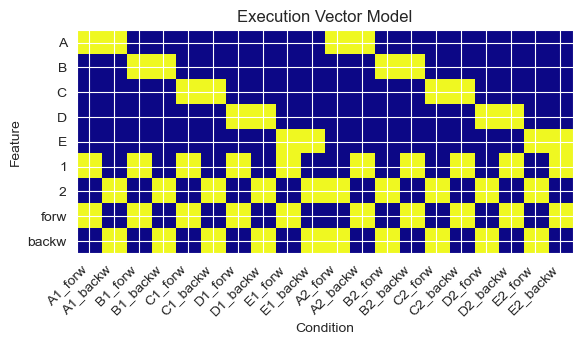

In [30]:
def create_exec_vector_model(conditions:list) -> np.array:
    """



    :conditions: list of the conditions that will become vector representations
    :return vector_mode: a different vector for each condition as a np.array of size (len(conditions), len(different stimuli)
    """

    # create a vector for each condition 
    # A - E, 1 - 2, f - b
    vector_model = np.zeros((len(conditions), 5 + 2 + 2)) 

    # one hot encoding for each of the five patterns
    for idx, condition in enumerate(conditions):
        # encode the pattern

        # A - E
        if condition[0] == 'A':
            vector_model[idx, 0] = 1
        elif condition[0] == 'B':
            vector_model[idx, 1] = 1
        elif condition[0] == 'C':
            vector_model[idx, 2] = 1
        elif condition[0] == 'D':
            vector_model[idx, 3] = 1
        elif condition[0] == 'E':
            vector_model[idx, 4] = 1
        

        # This is wrong: since A1f has the same execution as A2b
        # 1 - 2
        print(condition)
        if condition[1::] == '1_forw' or condition[1::] == '2_backw':
            vector_model[idx, 5] = 1
            vector_model[idx, 7] = 1
        elif condition[1::] == '1_backw' or condition[1::] == '2_forw':
            vector_model[idx, 6] = 1
            vector_model[idx, 8] = 1
        # f - b
        # if condition[2] == 'f':
        #     vector_model[idx, 7] = 1
        # elif condition[2] == 'b':
        #     vector_model[idx, 8] = 1
 
    return vector_model.T



def compute_similarity_matrix(vector_model:np.array) -> np.array:
    """
    Compute the similarity matrix between the different conditions
    :param vector_model: a different vector for each condition
    :return: similarity matrix
    """
    # compute the similarity matrix
    RSM_Model = np.zeros((len(vector_model.T), len(vector_model.T)))
    for idx1, vector1 in enumerate(vector_model.T):
        for idx2, vector2 in enumerate(vector_model.T):
            RSM_Model[idx1, idx2] = similarity(vector1, vector2)

    # l2 normalize the RSM
    # RSM_Model = RSM_Model / np.linalg.norm(RSM_Model)
    return RSM_Model

def similarity(vector1, vector2, TYPE = 'cosine'):
    """
    Compute the similarity between two vectors
    :param vector1: first vector
    :param vector2: second vector
    :param TYPE: type of similarity to compute
    :return: similarity between the two vectors
    """
    if TYPE == 'cosine':
        return np.dot(vector1, vector2) / (np.linalg.norm(vector1) * np.linalg.norm(vector2))
    elif TYPE == 'euclidean':
        return np.linalg.norm(vector1 - vector2)
    else:
        raise ValueError(f"TYPE {TYPE} not recognized.")




vector_model = create_exec_vector_model(conditions)

plt.imshow(vector_model, cmap='plasma')
plt.xlabel("Condition")
plt.xticks(range(len(conditions)), conditions, rotation=45, horizontalalignment='right')
plt.ylabel("Feature")
plt.yticks(range(9), ['A', 'B', 'C', 'D', 'E', '1', '2', 'forw', 'backw'], horizontalalignment='right')
plt.title("Execution Vector Model")
# RSM_Model = compute_similarity_matrix(vector_model)
# plt.imshow(RSM_Model, cmap='plasma')
plt.show()

RSM_Model = compute_similarity_matrix(vector_model)
# plt.imshow(RSM_Model, cmap='plasma')
# plt.xlabel("Condition")
# plot_RDM(RSM_Model, 'Vector Model Similarity Matrix', conditions)

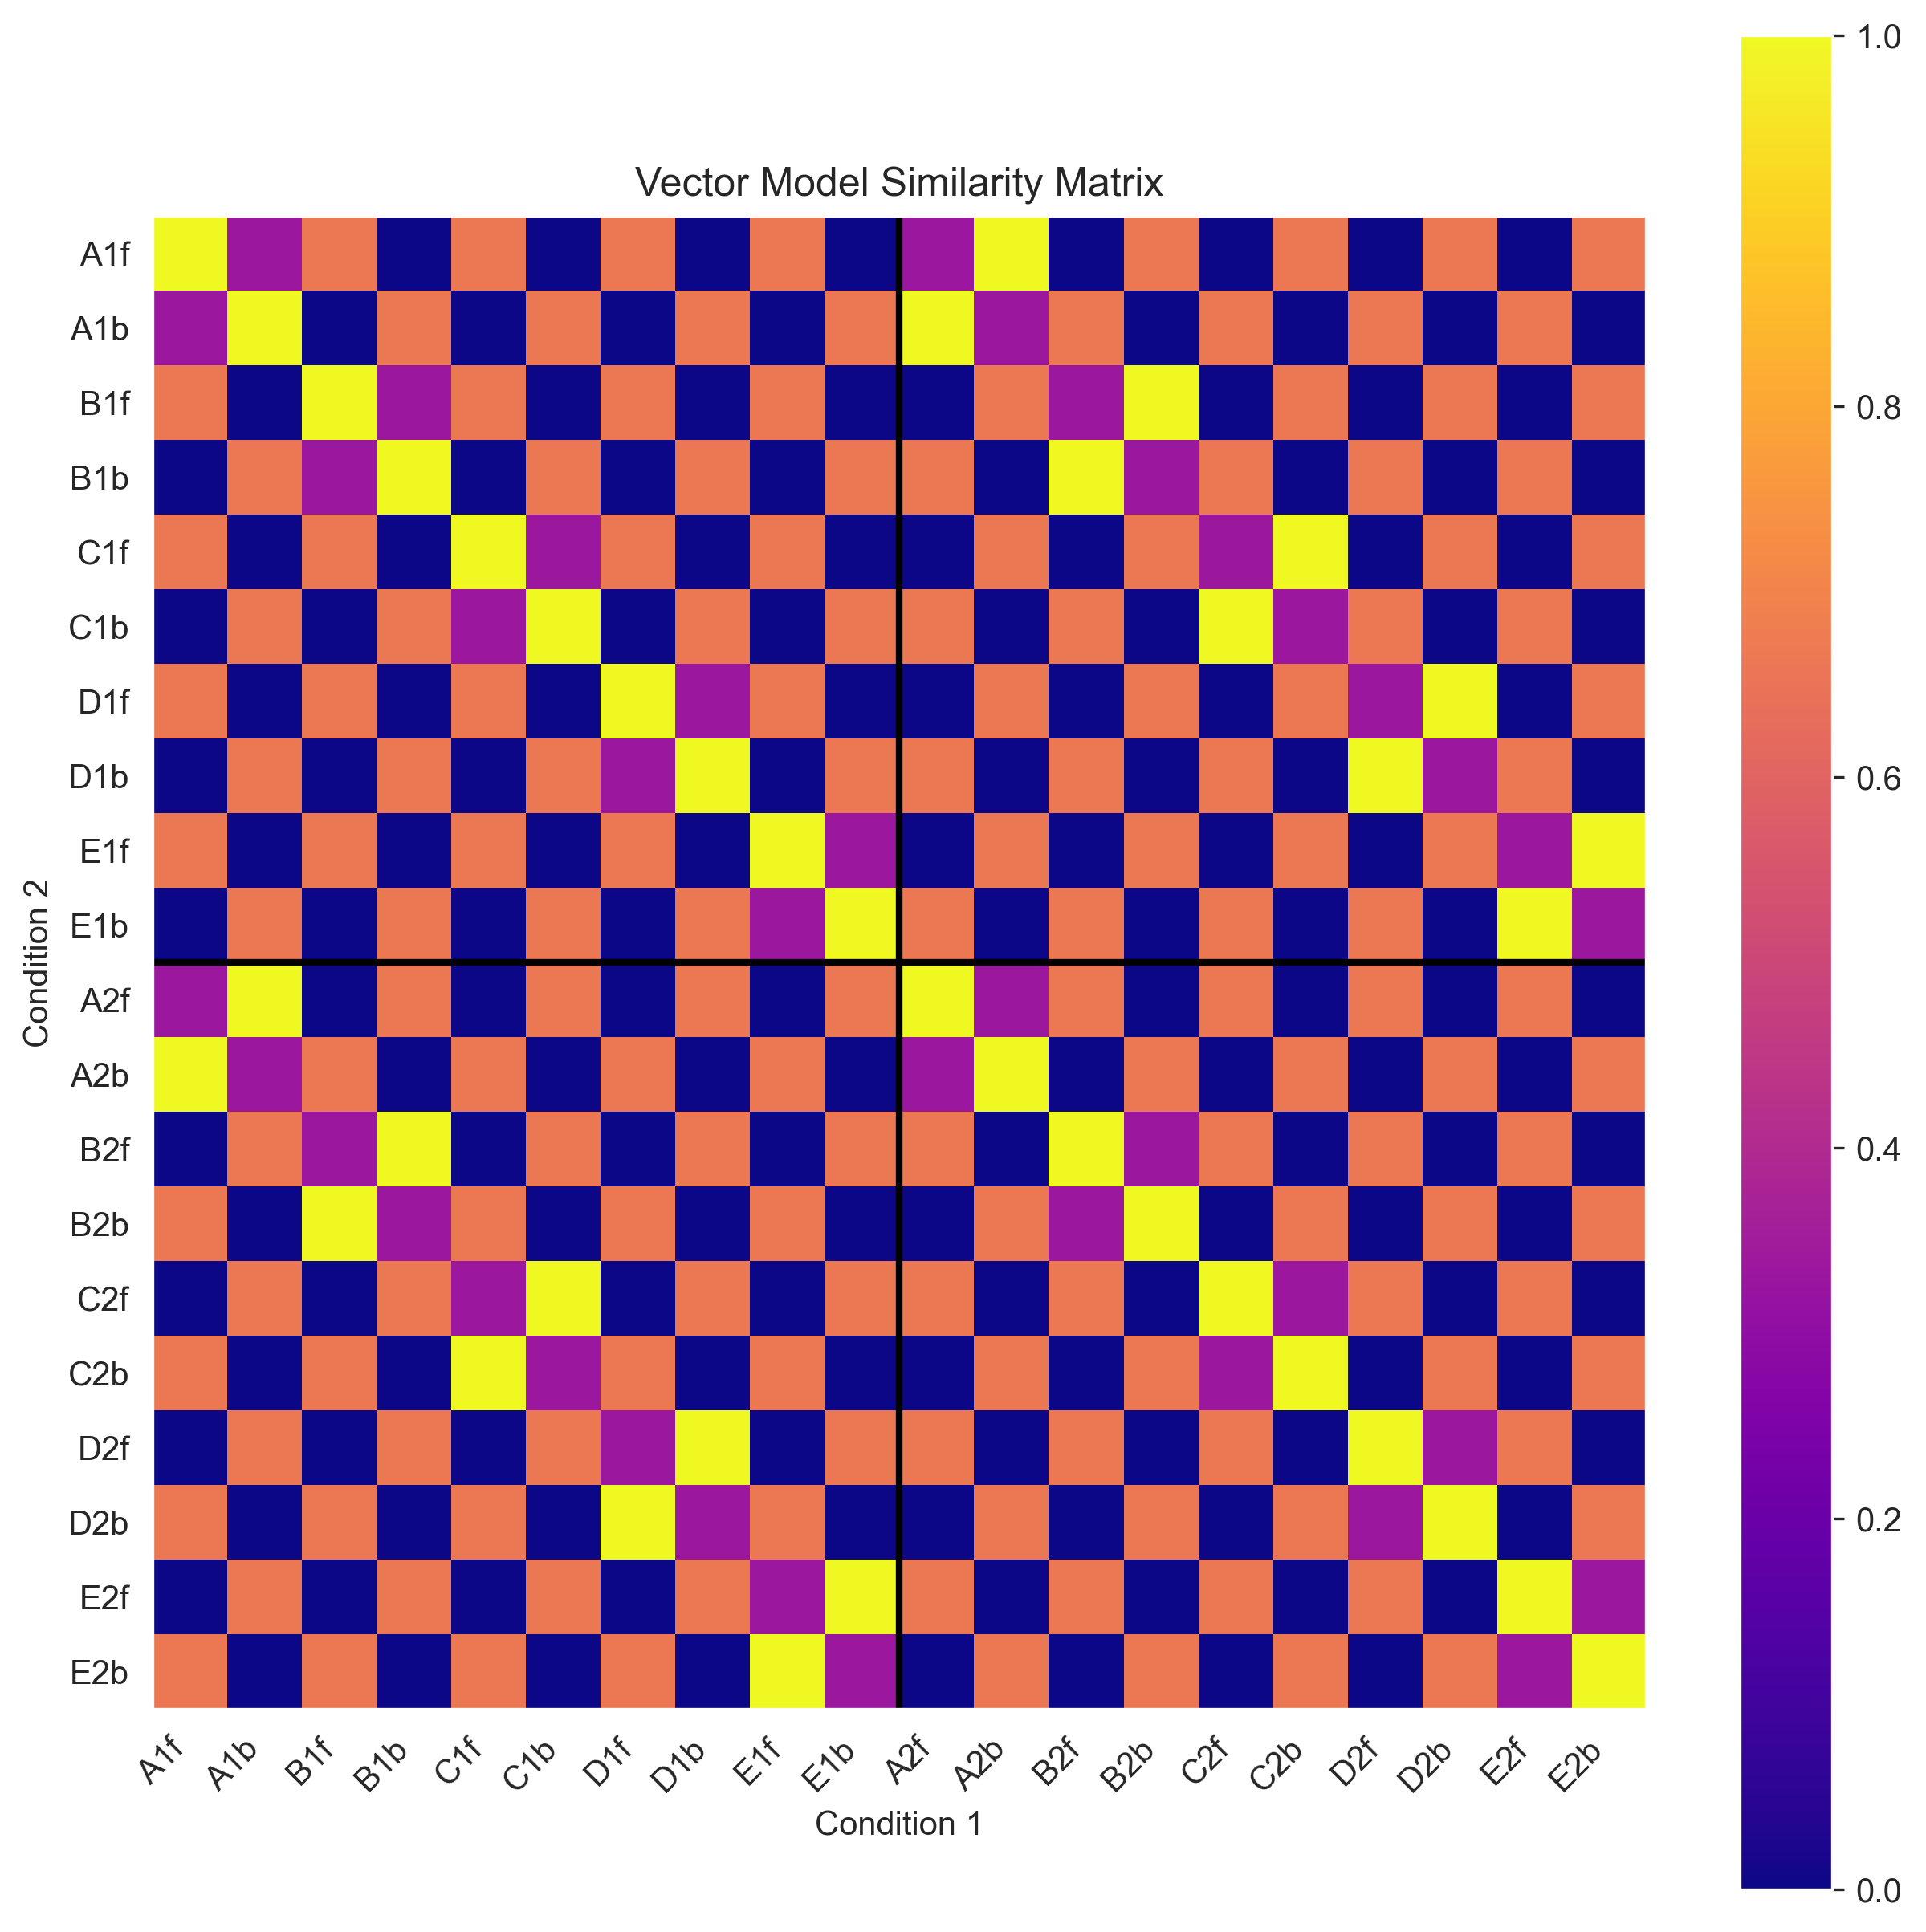

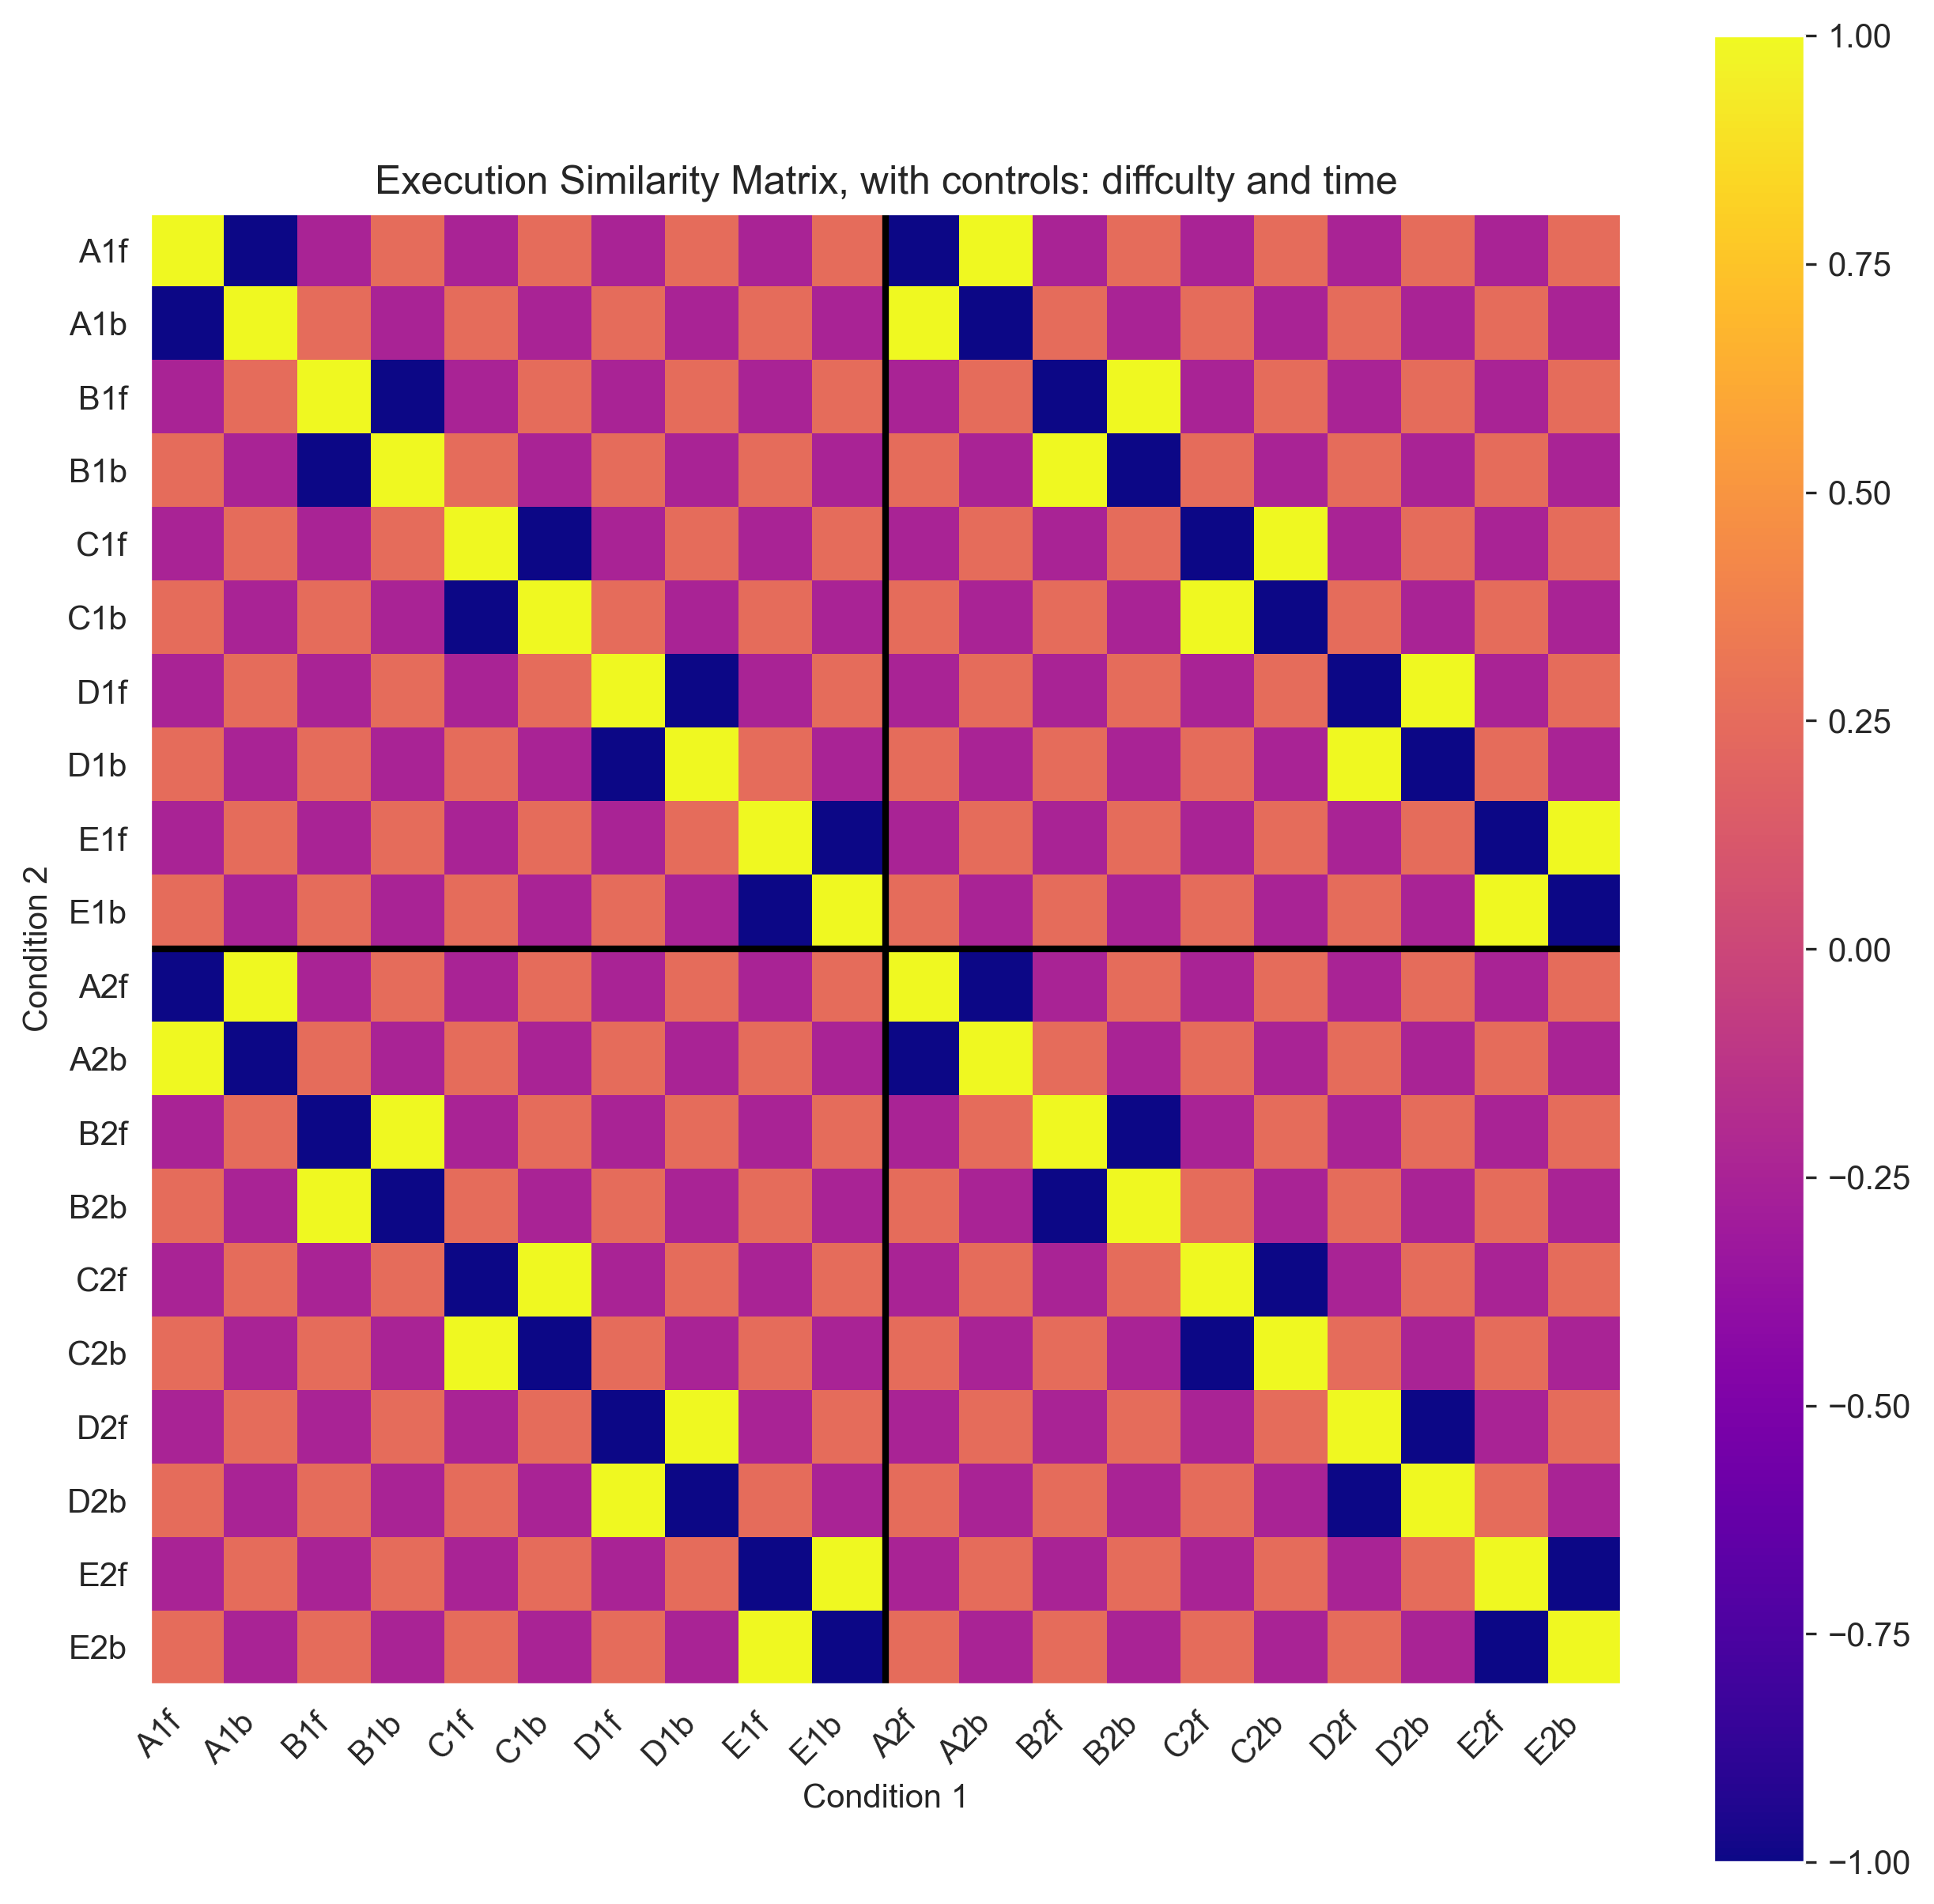

In [25]:
plot_RDM(RSM_Model, 'Vector Model Similarity Matrix', conditions)
plot_RDM(rsm, 'Execution Similarity Matrix, with controls: diffculty and time', conditions) 

## Pipline from vectors from conditions to the data rdm v.s. the model rdm
- get the new cross-val script 
- make it a "crossvalidationed" matrix to put into the data rdm script
- look at the searchlight and  scripts 